### Unity of a phase function

Given these:

- phase function $P(\omega_o, \omega_i) : S^2 \times S^2 \to R$,
- radiance $L(\omega_i) : S^2 \to R$,
- $\phi(\omega_i) \equiv \int_{\omega_o} P(\omega_o, \omega_i)$,
- $I_{\text{in}} \equiv \int_{\omega_i} L(\omega_i)$,
- $I_{\text{out}} \equiv \int_{\omega_o} \int_{\omega_i} P(\omega_o, \omega_i) L(\omega_i)$,

then,

$
\begin{align}
I_{\text{out}}
    &\equiv \int_{\omega_o} \int_{\omega_i} P(\omega_o, \omega_i) L(\omega_i) \\
    &=      \int_{\omega_i} L(\omega_i) \int_{\omega_o} P(\omega_o, \omega_i) \\
    &=      \int_{\omega_i} L(\omega_i) \, \phi(\omega_i).
\end{align}
$

Now, by requiring $I_{\text{in}} = I_{\text{out}}$, we obtain:

$
\int_{\omega_i} L(\omega_i) = \int_{\omega_i} L(\omega_i) \, \phi(\omega_i).
$

Here, $L(\omega)$ is arbitrary continous function, so, we got $\phi(\omega_i) = 1$.

### Scattering symmetry

Writing $p_l = p + l \, \omega$, then light transport equation reads:

$
\begin{align}
\partial_l L(p_l, \omega)
    &= - \sigma_{t}(p_l, \omega) \, L(p_l, \omega)
       + L_{ve}(p_l, \omega)
       + \sigma_{s}(p_l, \omega) \int_{\omega_i} P(\omega, \omega_i) \, L(p_l, \omega_i)
\end{align}
$

where

- $\sigma_{t} = \sigma_{abs} + \sigma_{s}$ (attenuation = absorption + out-scattering)

By extracting scattering terms and noting unity of phase function, we see:

$
\begin{align}
\text{RHS}_{\text{scatter}}
    &=
        - \sigma_{s}(p_l, \omega) \, L(p_l, \omega)
        + \sigma_{s}(p_l, \omega) \int_{\omega_i} P(\omega, \omega_i) \, L(p_l, \omega_i)
    \\
    &=
        \sigma_{s}(p_l, \omega)
            \bigg(
                - \int_{\omega_o} P(\omega_o, \omega) \, L(p_l, \omega)
                + \int_{\omega_i} P(\omega, \omega_i) \, L(p_l, \omega_i)        
            \bigg),
\end{align}
$

which, I think, looks nicer in terms of symmetry of in/out.

### Delta-tracking sampling correctness proof

Given:

- $f(x) = \exp(-x) : R_{\ge 0} \to [0, 1]$ (i.e. Exponential distribution)
- $\sigma(x) : R_{\ge 0} \to [0, 1]$
- $g(x) = \sigma(x) \exp(- \int_{x' \in [0, x]} \sigma(x')) : R_{\ge 0} \to [0, 1]$,

then, noting:

$
\begin{align}
\int_{x' \in [0, x]} \sigma(x')
    &= \int_{x' \in [0, x]} (1 - 1 + \sigma(x')) \\
    &= x - \int_{x' \in [0, x]} (1 - \sigma(x')),
\end{align}
$

we got:

$
\begin{align}
g(x)
    &= \sigma(x) \, \exp(- x) \exp(\int_{x' \in [0, x]} (1 - \sigma(x'))) \\
    &= f(x) \sigma(x) \exp(\int_{x' \in [0, x]} (1 - \sigma(x'))).
\end{align}
$

Further, by noting that

- $\sigma(x), \; (1 - \sigma(x)) \le 1$,
- $\int_{[0, x]} (1 - \sigma) \ge 0$,
- $\exp(\int_{[0, x]} (1 - \sigma)) \le 1$,

we see

- $g(x) \le f(x)$.

Thus, clearly, $g(x)$ is not "normalized" (i.e. not probability density), so here we implicitly \
extend $g(x)$ with "escape probility" of $g(\bot) = 1 - \int_{R_{\ge0}} g$.

Now, we're going to analyze "Delta tracking sampling".

Its sampling procedure can be written as follows:

- (0a) sample $x_0$ from density $f(x)$,
- (0b) accept $x_0$ with probability $\sigma(x_0)$,
- (1) if $x_0$ rejected,
- (1a) sample $x_1$ from density $f(x_1)$,
- (1b) accept $x_0 + x_1$ with probability $\sigma(x_0 + x_1)$,
- ... and so on ...

Then, it's easy to see that the probability of accepting $x_0 \in [0, \hat{x}]$
(which we write as follows) is:

$
\begin{align}
\text{Prob}[\text{accept}\; x_0 \le \hat{x}]
    = \int_{x \le \hat{x}} \sigma(x) f(x).
\end{align}
$

Also, we see that the probability of accepting $x_0 + x_1 \in [0, \hat{x}]$ is:

$
\begin{align}
\text{Prob}&[\text{reject}\; x_0 \wedge \text{accept}\; x_0 + x_1 \le \hat{x}]
    \\
    & = \int_{x_0 \le \hat{x}} f(x_0) (1 - \sigma(x_0))
           \int_{x_1' \le \hat{x} - x_0} f(x_1) \sigma(x_0 + x_1)
    \\
    & = \int_{x_0 \le \hat{x}} f(x_0) (1 - \sigma(x_0))
           \int_{x_0 \le x_1' \le \hat{x}} f(x_1' - x_0) \sigma(x_1')
    \\
    & = \int_{0 \le x_0 \le \hat{x}} \int_{x_0 \le x_1' \le \hat{x}}
            f(x_0) f(x_1' - x_0) (1 - \sigma(x_0)) \sigma(x_1')
    \\
    & = \int_{0 \le x_0 \le \hat{x}} \int_{x_0 \le x_1' \le \hat{x}}
            f(x_1') (1 - \sigma(x_0)) \sigma(x_1')
        \quad \big( \text{∵ $f(x)$ : multiplicative} \big)
    \\
    & = \int_{0 \le x_1' \le \hat{x}} \int_{0 \le x_0 \le x_1'}
            f(x_1') (1 - \sigma(x_0)) \sigma(x_1')
        \quad \big( \text{∵ "flipping" domain} \big)
    \\
    & = \int_{0 \le x \le \hat{x}} f(x) \sigma(x)
            \int_{0 \le x' \le x} (1 - \sigma(x')) 
\end{align}
$


Now, we can generalize this analysis to obtain the probability of accepting $x \in [0, \hat{x}]$ at n-th step
(which we denote by $P_{n, \hat{x}}$) :

$
\begin{align}
P_{n, \hat{x}} &\equiv
    \text{Prob}[\text{reject}\; x_0 ... x_{n-1} \wedge \text{accept}\; x_0 + ... + x_n \le \hat{x}]
    \\
    & = \int_{0 \le x \le \hat{x}} f(x) \sigma(x)
            \int_{0 \le x_1 \le x} (1 - \sigma(x_1)) 
                \int_{0 \le x_2 \le x_1} (1 - \sigma(x_2)) ...
                    \int_{0 \le x_n \le x_{n - 1}} (1 - \sigma(x_n))
    \\
    & = \int_{0 \le x \le \hat{x}} f(x) \sigma(x)
            \frac{
                \big( 
                    \int_{0 \le x' \le x} (1 - \sigma(x'))
                \big)^{n}
            }{n!}
        \quad  \big( \text{∵ by symmetry (spliting n-dim cube) } \big)
\end{align}
$

So, by summing all these "exclusive" contribution, we finally obtain the cumulative distribution of
accepting the value $x \in [0, \hat{x}]$ by delta-tracking sampling:

$
\begin{align}
\text{Prob}[x \le \hat{x}] &= \sum_{n} P_{n, \hat{x}}
\end{align}
$

Now, going back to our density $g$, the goal is to prove:

$
\begin{align}
\text{Prob}[x \le \hat{x}]
    &= \int_{0 \le x \le \hat{x}} g(x)
    \\
    &= \int_{0 \le x \le \hat{x}} f(x) \sigma(x) \exp(\int_{0 \le x' \le x} 1 - \sigma(x'))
\end{align}
$

Indeed, by expanding Taylor series of $\exp$, we can see each term corresponds to $P_{n, \hat{x}}$:

$
\begin{align}
\exp(\int_{0 \le x' \le x} 1 - \sigma(x'))
    &= 1 + \big( \int_{0 \le x' \le x} 1 - \sigma(x') \big)
         + \frac{\big( \int_{0 \le x' \le x} 1 - \sigma(x') \big)^2}{2!}
         + ....
\end{align}
$

QED.

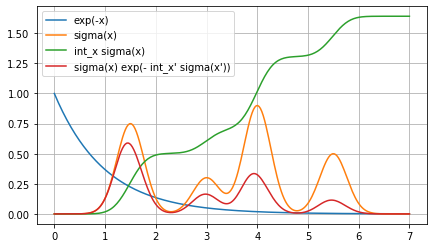

In [2]:
#
# Delta-tracking sampling correctness numerical demonstration
#

import numpy as np; Np = np.array
import matplotlib.pyplot as plt


# Plot a few important functions appearing in the discussion above
def _():
    x = np.linspace(0, 7, num=2**8)
    
    # example sigma(x) as sum of some simple bumps
    bump_params = [[0.75, 1.5], [0.3, 3.0], [0.9, 4], [0.5, 5.5]]
    sx = sum(a * np.exp(- 7 * (x - b)**2) for a, b in bump_params)
    assert all(sx < 1)
    
    integ_sx = np.cumsum(sx) * (x[1] - x[0])
    gx = sx * np.exp(- integ_sx)    
    
    fig, ax = plt.subplots(figsize=(7, 4))
    ax.grid()
    ax.plot(x, np.exp(-x), label=f"exp(-x)")
    ax.plot(x, sx,         label=f"sigma(x)")
    ax.plot(x, integ_sx,   label=f"int_x sigma(x)")
    ax.plot(x, gx,         label=f"sigma(x) exp(- int_x' sigma(x'))")
    ax.legend()

_()

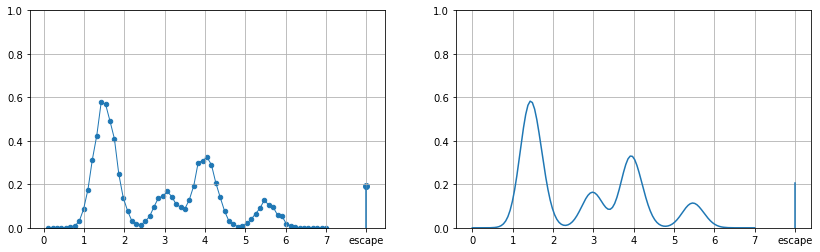

In [5]:
import numpy as np; Np = np.array
import matplotlib.pyplot as plt


# `escape_bound` is such that sigma(x) = 0 for x > `escape_bound`.
# So, there's zero probability of accepting further than `escape_bound`.
def sample_delta_tracking(sigma, escape_bound=7, rng=np.random):
    x = 0
    while True:
        # a. sample exponential distrib exp(-t)
        t = - np.log(1 - rng.random())
        
        # b. accept with prob. sigma(x)
        x += t
        
        # b.1. escape check
        if escape_bound < x:
            return None

        # b.2. 
        if rng.random() < sigma(x):
            return x

        
def sample_many(sigma, n):
    samples = []
    escape_count = 0
    for i in range(n):
        x = sample_delta_tracking(sigma)
        if x is None:
            escape_count += 1
        else:
            samples.append(x)    
            
    return samples, escape_count


def plot_reference(ax, sigma):
    x = np.linspace(0, 7, num=2**7)
    dx = x[1] - x[0]
    sigmax = sigma(x)
    integ_sigmax = np.cumsum(sigmax) * dx
    y = sigmax * np.exp(- integ_sigmax)
    y_escape = 1 - np.sum(y) * dx

    ax.set(ylim=[0, 1], xticks=np.arange(9), xticklabels=list(np.arange(8)) + ['escape'])
    ax.grid()
    ax.plot(x, y)
    ax.plot([8, 8], [0, y_escape], color='C0')


def plot_delta_tracking(ax, samples, escape_count, n):
    hist, bin_edges = np.histogram(Np(samples), range=(0, 7), bins=2**6)
    dx = bin_edges[1] - bin_edges[0]
    x = dx + bin_edges[:-1]
    y = hist / (N * dx)
    y_escape = escape_count / N

    ax.set(ylim=[0, 1], xticks=np.arange(9), xticklabels=list(np.arange(8)) + ['escape'])
    ax.grid()
    ax.scatter(x, y, s=20)
    ax.plot(x, y, linewidth=1)

    ax.scatter([8], [y_escape], c='C0')
    ax.plot([8, 8], [0, y_escape], color='C0')        


# Example sigma(x) as sum of some simple bumps
bump_params = [[0.75, 1.5], [0.3, 3.0], [0.9, 4], [0.5, 5.5]]
sigma = lambda x: sum(a * np.exp(- 7 * (x - b)**2) for a, b in bump_params)

# Execute sampling
N = 2**14
samples, escape_count = sample_many(sigma, N)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(7 * 2, 4))
plot_delta_tracking(axes[0], samples, escape_count, N)
plot_reference(axes[1], sigma)

### Monte Carlo evaluation of homogeneous volume lighting equation

To evaluate such $L$ as:

$
\begin{align}
L =
    \big(
        \int_{0 \le l \le l_0} \exp(- \sigma \, l) L_v
    \big)
    + \exp(- \sigma \, l_0) L_s,
\end{align}
$

by writing:
    
- $\rho(l) = \sigma \exp(-\sigma l)$ (i.e. exponential distribution),
- $P_{l_0} = \int_{0 \le l \le l_0} \rho(l) = 1 - \exp(- \sigma l_0)$,
  (thus, $1 - P_{l_0} = \exp(- \sigma l_0) = \frac{\rho(l_0)}{\sigma}$)

then, we can rewrite $L$ as follows:

$
\begin{align}
L
    &=
        \big(
            \int_{0 \le l \le l_0} \frac{\rho(l)}{\sigma} L_v
        \big)
        + \frac{\rho(l_0)}{\sigma} L_s
    \\
    &=
        P_{l_0}
            \big(
                \int_{0 \le l \le l_0} \frac{\rho(l)}{P_{l_0}} \frac{1}{\sigma} L_v
            \big)
        + 
        (1 - P_{l_0})
            \frac{\rho(l_0)}{(1 - P_{l_0})\sigma} L_s      
    \\
    &=
        P_{l_0}
            \big(
                \int_{0 \le l \le l_0} \frac{\rho(l)}{P_{l_0}} \frac{1}{\sigma} L_v
            \big)
        + 
        (1 - P_{l_0}) L_s
\end{align}
$

From this formula, we can see that:

- the sum of left and right terms can be evaluated as expected value of Bernoulli trial with probability $P_{l_0}$,

- the interal in the left term can be evaluated
  as expected value of probability density $\frac{\rho(l)}{P_{l_0}}$ on $[0, l_0]$
  with "integrand" $\frac{1}{\sigma} L_v$.
  
Or, actually we can simply write:

$
\begin{align}
L
    &=
        \big(
            \int_{0 \le l \le l_0} \rho(l) \, \frac{L_v}{\sigma}
        \big)
        + (1 - P_{l_0}) L_s,
\end{align}
$

which can be evaluated as expected value of the distribution defined as the sum of continuous part and delta distribution:

- $Q(S) = \int_{l \in S} \rho(l) $ (where $l_0 \notin S$)
- $Q(\{l_0\}) = 1 - P_{l_0}$

### Monte Carlo evaluation of inhomogeneous volume lighting equation

As a generalization from above, to evaluate such $L$ as:

$
\begin{align}
L =
    \big(
        \int_{0 \le l \le l_0} T(l) \, L_v
    \big)
    + T(l_{l_0}) L_s,
\end{align}
$

where

- $T(l) = \exp \big(- \int_{0 \le l' \le l} \sigma(l') \big)$,

by writing:
    
- $\rho(l) = \sigma(l) T(l) = - \partial_{l} T(l)$,
- $P_{l_0} = \int_{0 \le l \le l_0} \rho(l) = 1 - T(l_0)$,

we obtain similar formula for $L$:

$
\begin{align}
L
    &=
        \big(
            \int_{0 \le l \le l_0} \rho(l) \, \frac{L_v}{\sigma(l)}
        \big)
        + (1 - P_{l_0}) L_s.
\end{align}
$

So, same Monte Carlo evaluation strategy can be employed.

### Ratio-tracking correctness

Given

- $\sigma : R_{\ge 0} \to [0, 1]$,
- $\hat{x} \in R_{\ge 0}$,

we define sampling procedure of $T$ by:

- (Initialization) Define $T = 1$,
- (Step 0.a) Sample $x_0 \in R_{\ge 0}$ from distribution $\exp(-x)$,
- (Step 0.b) Return $T$ if $\hat{x} \le x_0$,
- (Step 0.c) Update $T = (1 - \sigma(x_0)) \times T$,
- (Step 1.a) Sample $x_1 \in R_{\ge 0}$ from distribution $\exp(-x)$,
- (Step 1.b) Return $T$ if $\hat{x} \le x_0 + x_1$,
- (Step 1.c) Update $T = (1 - \sigma(x_0 + x_1)) \times T$,
- ... and so on...

Our goal is to show:

$
\begin{align}
E[T] &= \exp \big(- \int_{x \le \hat{x}} \sigma(x) \big)
\\
     &= \exp \big(- \hat{x} + \int_{x \le \hat{x}} 1 - \sigma(x) \big)
\\
     &= \exp(- \hat{x}) \exp \big(\int_{x \le \hat{x}} 1 - \sigma(x) \big)
\\
     &= \exp(- \hat{x}) \sum_n \frac{\big(\int_{x \le \hat{x}} 1 - \sigma(x) \big)^n}{n!}.
\end{align}
$


First we show the probability of "not returning T" is 0.

We note:

$
\newcommand{\Pr}[0]{\text{Pr}}
\begin{align}
\Pr[\text{return at $0$-th step}]
    &= \int_{\hat{x} \le x_0} \exp(-x_0) = \exp(-\hat{x})
\\
\Pr[\text{return at $1$-th step}]
    &= \int_{x_0 \le \hat{x}} \exp(-x_0) \int_{\hat{x} - x_0 \le x_1} \exp(-x_1)
     = \int_{x_0 \le \hat{x}} \exp(-x_0) \exp(- ( \hat{x} - x_0))
     = \int_{x_0 \le \hat{x}} \exp(- \hat{x})
\\
    &= \exp(- \hat{x}) \hat{x}
\\
...
\\
\Pr[\text{return at $n$-th step}]
    &= \int_{x_0 \le \hat{x}} \exp(-x_0)
       \int_{x_1 \le \hat{x} - x_0 } \exp(-x_1)
       ...
       \int_{x_{n-1} \le \hat{x} - x_0 - x_1 .. - x_{n-2}} \exp(-x_{n-1})
       \int_{\hat{x} - x_0 - x_1 .. - x_{n-1} \le x_n} \exp(-x_n)
\\
    &= \int_{x_0 \le \hat{x}} \exp(-x_0)
       \int_{x_1 \le \hat{x} - x_0 } \exp(-x_1)
       ...
       \int_{x_{n-1} \le \hat{x} - x_0 - x_1 .. - x_{n-2}} \exp(-x_{n-1})
       \exp(- (\hat{x} - x_0 - x_1 .. - x_{n-1}))
\\
    &= \exp(- \hat{x})
            \int_{x_0 \le \hat{x}}
            \int_{x_1 \le \hat{x} - x_0 }
            ...
            \int_{x_{n-1} \le \hat{x} - x_0 - x_1 .. - x_{n-1}} 1
\\
    &= \exp(- \hat{x}) \frac{\hat{x}^n}{n!}  \quad \big( \text{∵ volume of n-symplex} \big),
\end{align}
$

Thus,

$
\begin{align}
\sum_n \Pr[\text{return at $n$-th step}] 
    &= \exp(- \hat{x}) \sum_n \frac{\hat{x}^n}{n!}
    =  \exp(- \hat{x})  \exp(+ \hat{x}) = 1.
\end{align}
$

To prove our goal, we define $T_n$ by

$
T_n =
\begin{cases}
T \quad (\text{if return at $n$-th step})
\\
0 \quad (\text{otherwise}),
\end{cases}
$

then, we clearly have $T = \sum_n T_n$.

Now, by the similar argument as in $\Pr[\text{return at $n$-th step}]$, we can see:

$
\begin{align}
E[T_0]
    =& \int_{\hat{x} \le x_0} \exp(-x_0) = \exp(-\hat{x})
\\
E[T_1]
    =& \int_{x_0 \le \hat{x}} \exp(-x_0) (1 - \sigma(x_0)) \int_{\hat{x} - x_0 \le x_1} \exp(-x_1)
\\
    =& \, \exp(- \hat{x})  \int_{x_0 \le \hat{x}} (1 - \sigma(x_0))
\\
...
\\
E[T_n]
    =& \int_{x_0 \le \hat{x}} \exp(-x_0) (1 - \sigma(x_0))
       \int_{x_0 \le \hat{x} - x_1} \exp(-x_1) (1 - \sigma(x_0 + x_1))
       ...
       \int_{x_{n-1} \le \hat{x} - x_0 - x_1 .. - x_{n-2}} \exp(-x_{n-1}) (1 - \sigma(x_0 + ... + x_{n-1}))
\\
       &\int_{\hat{x} - x_0 - x_1 .. - x_{n-1} \le x_n} \exp(-x_n)
\\
    =& \, \exp(- \hat{x})
           \int_{x_0 \le \hat{x}} (1 - \sigma(x_0))
           \int_{x_0 \le \hat{x} - x_1} (1 - \sigma(x_0 + x_1))
           ...
           \int_{x_{n-1} \le \hat{x} - x_0 - x_1 .. - x_{n-2}} (1 - \sigma(x_0 + ... + x_{n-1}))
\\
    =& \, \exp(- \hat{x})
           \int_{y_0 \le \hat{x}} (1 - \sigma(y_0))
           \int_{y_0 \le y_1 \le \hat{x}} (1 - \sigma(y_1))
           ...
           \int_{y_{n-2} \le y_{n_1} \le \hat{x}} (1 - \sigma(y_{n-1}))
        \quad \big( \text{∵ change of variable} \big)           
\\
    =& \, \exp(- \hat{x}) \frac{(\int_{x \le \hat{x}} (1 - \sigma(x)))^n}{n!}
        \quad \big( \text{∵ symmetry of n-dim cube} \big)
\end{align}
$

Thus, we obtain:

$
\begin{align}
E[T] &= \sum_n E[T_n]
\\   &= \exp(- \hat{x}) \sum_n \frac{(1 - \sigma(\hat{x}))^n}{n!}.
\end{align}
$

### Volume lighting equation from integro-differential equation to integral equation

Given:

- $\sigma_a(p, w)$,
- $\sigma_b(p, w)$,
- $\rho(w_o, w_i)$
- $A(p, w)$,
- $p_t \equiv p + t w$,

we define integro-differential equation for $L(p, w)$ by:

$
\begin{align}
\partial_t L(p_t, w)
    &= - \sigma_a(p_t, w) \, L(p_t, w) + A(p_t, w)
       + \sigma_b(p_t, w) \int_{dw_i} \rho(w, w_i) L(p_t, w_i)
    \\
    &= - \sigma_a(p_t, w) \, L(p_t, w) + K(p_t, w),
\end{align}
$

where 

- $K(p_t, w) \equiv A(p_t, w) + \sigma_b(p_t, w) \int_{dw_i} \rho(w, w_i) L(p_t, w_i)$.

We also define integral equation by:

$
\newcommand{\Tr}[0]{\text{Tr}} 
\begin{align}
L(p_t, w) &= \Tr(t, s, p, w) L(p_s, w) + \int_{u \in [s, t]} \Tr(t, u, p, w) K(p_u, w).
\end{align}
$

where

- $\Tr(t, s, p, w) \equiv \exp(- \int_{u \in [s, t]} \sigma_a(p_u, w))$.

For concise notation, we often omit the argument of functions when context makes it clear (e.g. $\Tr(t, s) \equiv \Tr(t, s, p, w)$).

Here we show the second integral equation implies first integro-differential equation.

First we note:

- $\Tr(t, t) = \exp(-0) = 1$,
- $\partial_t \Tr(t, s) = - \sigma_a(p_t, w) \Tr(t, s)$,

then, by usual derivative of integral formula, we have:

$
\begin{align}
\partial_t \int_{u \in [s, t]} \Tr(t, u) K(p_u, w)
    &=  \Tr(t, t) K(p_t, w)
        + \int_{u \in [s, t]} \partial_t \Tr(t, u) K(p_u, w)
    \\
    &=  K(p_t, w)
        - \sigma_a(p_t, w) \int_{u \in [s, t]} \Tr(t, u) K(p_u, w).
\end{align}
$

So, if we take derivative of RHS of original integral equation, we have:

$
\begin{align}
\partial_t
    &\big(
        \Tr(t, s) L(p_s, w)
        +
        \int_{u \in [s, t]} \Tr(t, u) K(p_u, w)
    \big)
\\
    &=
        - \sigma_a(p_t, w) \Tr(t, s) L(p_s, w)
        + K(p_t, w)
        - \sigma_a(p_t, w) \int_{u \in [s, t]} \Tr(t, u) K(p_u, w)
\\
    &=
        - \sigma_a(p_t, w)
            \big(
                \Tr(t, s) L(p_s, w)
                +
                \int_{u \in [s, t]} \Tr(t, u) K(p_u, w)  
            \big)
        + K(p_t, w)
\\
    &=
        - \sigma_a(p_t, w) L(p_t) + K(p_t, w).
\end{align}
$